# Introduction to Julia

![julia-logo](./figures/l1_julia-logo.png)

Compicampus ETHZ -- 2024

[github.com/mauro3/Julia-intro-ETHZ-Compicampus](https://github.com/mauro3/Julia-intro-ETHZ-Compicampus)

# The team

- Mauro Werder (@mauro3)
  - glaciologist by day
  - maintainer of a few Julia packages
  - programming Julia since 2013
- Ivan Utkin (@utkinis)
  - glaciologist by night
  - doing computational mechanics and HPC
  - programming Julia since 2015

# The format

Material is on GitHub https://github.com/mauro3/Julia-intro-ETHZ-Compicampus

Structure:
- this intro talk
- quick intro on VS-Code editor
- Hands-on on
  - Julia basics
  - package installations
  - plotting
- small project wrapping things up

## The Julia programming language

[Julia](https://julialang.org/) is a modern, interactive, and high performance programming language.  It's a general purpose
language with a bend on technical computing.

![julia-logo](./figures/l1_julia-logo-repl.png)

- first released in 2012
- reached version 1.0 in 2018
- current version 1.11 (11.2024)
- thriving community, for instance there are currently around 11000 [packages registered](https://juliahub.com/ui/Packages)

### What does Julia look like

An example solving the Lorenz system of ODEs:

In [1]:
function lorenz(x)
    σ = 10
    β = 8/3
    ρ = 28
    [σ    * (x[2] - x[1]),
     x[1] * (ρ - x[3]) - x[2],
     x[1]*x[2] - β*x[3]]
end

# integrate dx/dt = lorenz(t,x) numerically for 500 steps
dt = 0.01
x₀ = [2.0, 0.0, 0.0]
out = zeros(3, 500)
out[:,1] = x₀
for i=2:size(out,2)
    out[:,i] = out[:,i-1] + lorenz(out[:,i-1]) * dt
end

And its solution plotted

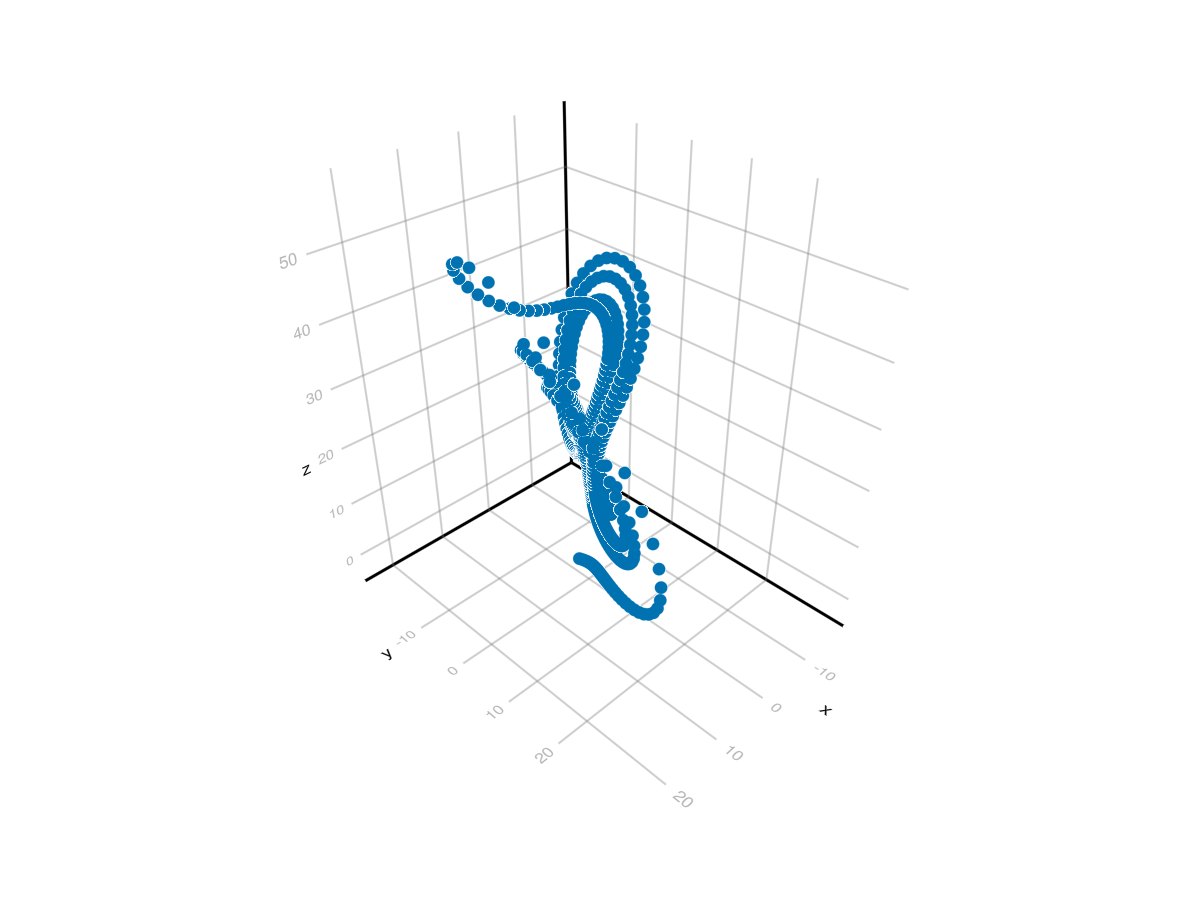

In [2]:
using GLMakie
plot(out[1,:], out[2,:], out[3,:])

### Julia in brief
Julia 1.0 released 2018, now at version 1.11

Features:
- general purpose language with a focus on technical computing
- dynamic language
- interactive development
- good performance on par with C & Fortran
  - just-ahead-of-time compiled via [LLVM](https://en.wikipedia.org/wiki/LLVM)
  - No need to vectorise: for loops are fast
- multiple dispatch
- user-defined types are as fast and compact as built-ins
- Lisp-like macros and other metaprogramming facilities
- designed for parallelism and distributed computation
- good inter-op with other languages

### The two language problem

**One language to prototype   --  one language for production**
- example from a co-worker: prototype in Matlab, production in CUDA-C

**One language for the users  --  one language for under-the-hood**
- Numpy (python -- C)
- machine-learning: pytorch, tensorflow

![](./figures/l1_ml.png)

### The two language problem

Prototype/interface language:
- easy to learn and use
- interactive
- productive
- --> *but slow*
- Examples: Python, Matlab, R, IDL...

Production/fast language:
- fast
- --> *but* complicated/verbose/not-interactive/etc
- Examples: C, C++, Fortran, Java...

###  Julia solves the two-language problem (mostly)

Julia is:
- easy to learn and use
- interactive
- productive

and also:
- fast

![](./figures/l1_flux-vs-tensorflow.png)

### Julia for HPC -- One of the reasons why we do Julia

<img src="./figures/l1_dynamics.png" alt="motivation" width="80%"/>

### Julia + GPU = 💜

<img src="./figures/l1_stream.png" alt="stream" width="80%"/>

### Write code once, execute everywhere

<img src="./figures/l1_backend_abstraction.png" alt="backend-abstraction" width="80%"/>

### Scaling

<img src="./figures/l1_scaling.png" alt="scaling" width="80%"/>

###  Let's get our hands dirty!

We will now look at
- variables and types
- control flow
- functions
- modules and packages

The documentation of Julia is good and can be found at [https://docs.julialang.org](https://docs.julialang.org); although for learning it might be a bit terse...

There are also tutorials, see [https://julialang.org/learning/](https://julialang.org/learning/).

Differences from other languages: [https://docs.julialang.org/en/v1/manual/noteworthy-differences/](https://docs.julialang.org/en/v1/manual/noteworthy-differences/)

ChatGPT, CoPilot and the like speak Julia and are good in translating, say, Python to Julia.

The community of Julia is helpful and active:
- [discourse.julialang.org/](https://discourse.julialang.org/) is good for long form questions
- (Stackoverflow is not used much)
- there are chat servers (Zulip and Slack), see [julialang.org/community/](https://julialang.org/community/)

Furthermore, documentation can be gotten with `?xyz`.  Try it (in Jupyter notebooks this needs to be in a cell of its own):

###  But first a short de-tour: Visual Studio Code

- nice, much used, open source editor [code.visualstudio.com/](https://code.visualstudio.com/)
- good Julia integration [www.julia-vscode.org/](https://www.julia-vscode.org/)